# Pakistani EDA

In [ ]:
import numpy as np
import pandas as pd
import sklearn.preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string
import nltk
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
from keras.utils import np_utils
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Thesis/excel files/Bipolar data final.xlsx") 

In [ ]:
df.head()

,Cases,Diagnosis,Mood-Stabilizer,Antipsychotic,Sleeping pills
0,Patient displayed aggressive and violent behav...,Bipolar I,Lithium,Seroquel,Rivotril
1,The patient exhibited aggressive and violent b...,Bipolar I,Lithium,Seroquel,Rivotril
2,The patient had ADHD like systems and extremel...,Bipolar I,Lithium,Seroquel,Rivotril
3,The patient lacks the attention span and obser...,Bipolar I,Lithium,Seroquel,Rivotril
4,The patient showed several inability to focus ...,Bipolar I,Lithium,Seroquel,Rivotril


In [ ]:
df.tail()

,Cases,Diagnosis,Mood-Stabilizer,Antipsychotic,Sleeping pills
595,"The patient tough extreme mood swings, athleti...",Cyclothymia,Tegretol,Olanzapine,Atarax
596,The patient beat his family in a very crazy fr...,Cyclothymia,Tegretol,Olanzapine,Atarax
597,The patient was obsessed with medicine in a fr...,Cyclothymia,Tegretol,Olanzapine,Atarax
598,"The patient lived in isolation, enjoying video...",Cyclothymia,Tegretol,Olanzapine,Atarax
599,The patient violently attacked a friend throug...,Cyclothymia,Tegretol,Olanzapine,Atarax


In [ ]:
df['Diagnosis'].value_counts()

BipolarII      200
Bipolar I      200
Cyclothymia    200
Name: Diagnosis, dtype: int64

In [ ]:
df['Mood-Stabilizer'].value_counts()

Lithium     200
Epival      200
Tegretol    200
Name: Mood-Stabilizer, dtype: int64

In [ ]:
df['Antipsychotic'].value_counts()

Olanzapine     200
Seroquel       200
Risperidone    200
Name: Antipsychotic, dtype: int64

In [ ]:
df.dtypes

Cases              object
Diagnosis          object
Mood-Stabilizer    object
Antipsychotic      object
Sleeping pills     object
dtype: object

In [ ]:
df.shape

(600, 5)

In [ ]:
df.describe()

,Cases,Diagnosis,Mood-Stabilizer,Antipsychotic,Sleeping pills
count,600,600,600,600,600
unique,600,3,3,3,3
top,This is cyclothymia case description. During t...,BipolarII,Lithium,Olanzapine,None
freq,1,200,200,200,200


Text(0.5, 1.0, 'Diagnosis')

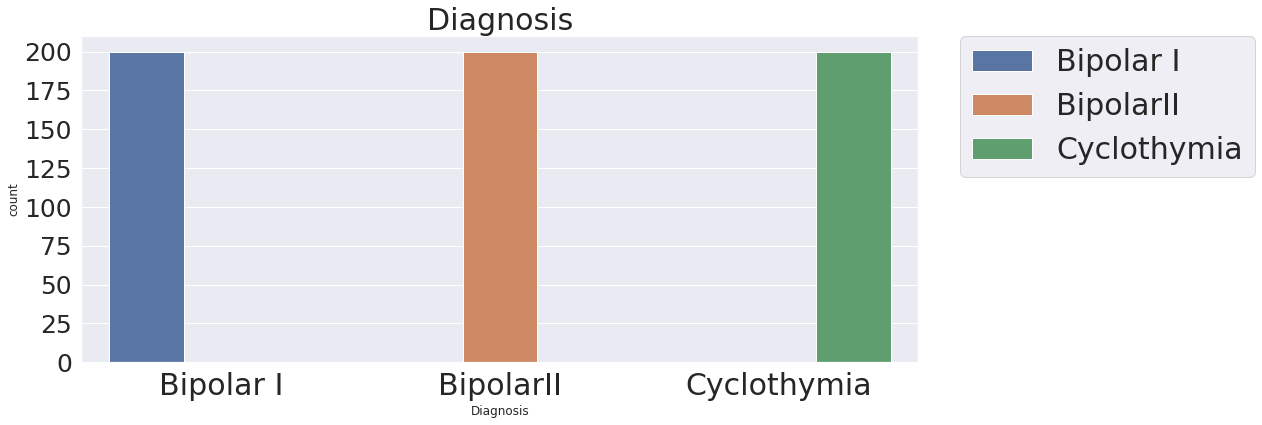

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="Diagnosis",hue="Diagnosis",data=df,)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title("Diagnosis",fontsize=30)

Text(0.5, 1.0, 'Mood Stabilizer')

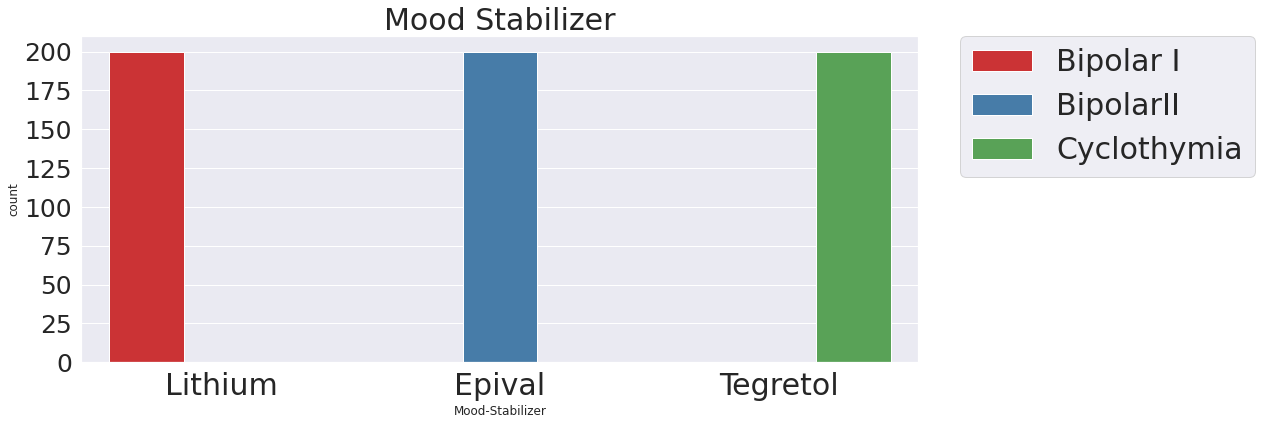

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="Mood-Stabilizer",hue="Diagnosis",data=df,palette="Set1")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title("Mood Stabilizer",fontsize=30)

Text(0.5, 1.0, 'Antipsychotic')

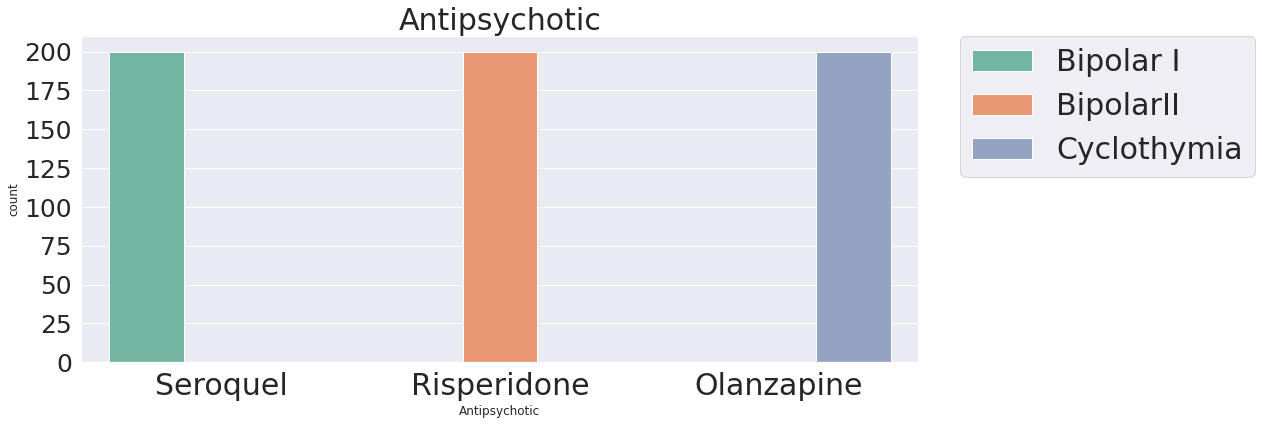

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="Antipsychotic",hue="Diagnosis",data=df,palette="Set2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title("Antipsychotic",fontsize=30)

Text(0.5, 1.0, 'Sleeping Pills')

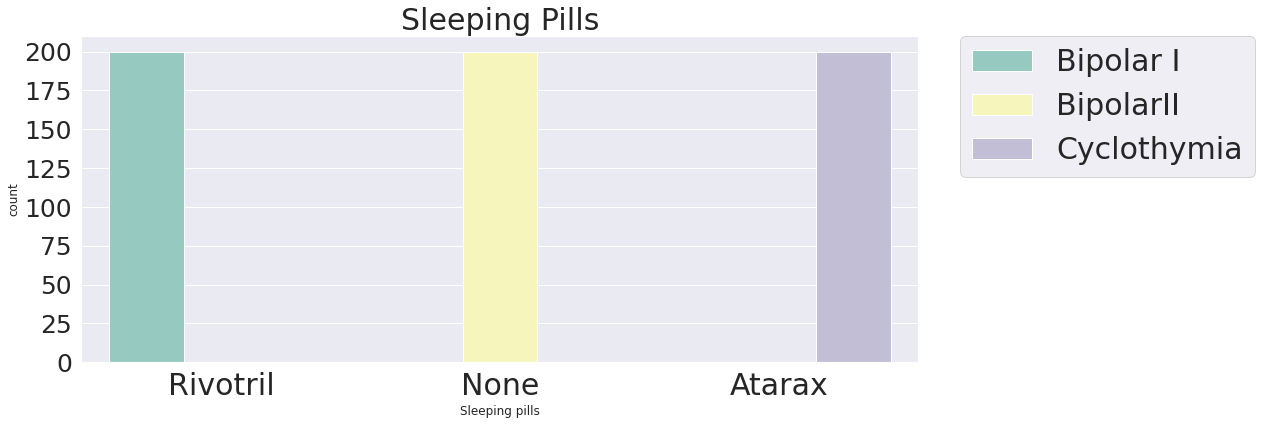

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="Sleeping pills",hue="Diagnosis",data=df,palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title("Sleeping Pills",fontsize=30)

In [ ]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df1 = df[['Cases','Diagnosis']]
df1.isnull().sum()

Cases        0
Diagnosis    0
dtype: int64

In [ ]:
df1.head()

,Cases,Diagnosis
0,Patient displayed aggressive and violent behav...,Bipolar I
1,The patient exhibited aggressive and violent b...,Bipolar I
2,The patient had ADHD like systems and extremel...,Bipolar I
3,The patient lacks the attention span and obser...,Bipolar I
4,The patient showed several inability to focus ...,Bipolar I


In [ ]:
df1.tail()

,Cases,Diagnosis
595,"The patient tough extreme mood swings, athleti...",Cyclothymia
596,The patient beat his family in a very crazy fr...,Cyclothymia
597,The patient was obsessed with medicine in a fr...,Cyclothymia
598,"The patient lived in isolation, enjoying video...",Cyclothymia
599,The patient violently attacked a friend throug...,Cyclothymia


In [ ]:
    #lower casing
    df['Cases'] = df['Cases'].str.lower()

    #punctuation removal         
    df["Cases"] = df["Cases"].apply(lambda text: remove_punctuation(text))

In [ ]:
df2=df1

In [ ]:
tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(df2['Cases'].values)
X = tokenizer.texts_to_sequences(df2['Cases'].values)
X = pad_sequences(X)

In [ ]:
df2['encoded']=df2['Diagnosis'].apply(lambda x: 0 if x=='Bipolar I' else 1)
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Cases,Diagnosis,encoded
0,Patient displayed aggressive and violent behav...,Bipolar I,0
1,The patient exhibited aggressive and violent b...,Bipolar I,0
2,The patient had ADHD like systems and extremel...,Bipolar I,0
3,The patient lacks the attention span and obser...,Bipolar I,0
4,The patient showed several inability to focus ...,Bipolar I,0


In [ ]:
from sklearn.model_selection import train_test_split#stratify ensures balance between spam and no spam in test and train
xtrain, xtest, ytrain, ytest =train_test_split(X, df2['encoded'], 
                                random_state=2018, 
                                test_size=0.3, 
                                stratify=df2['encoded'])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid1 = {"n_estimators": [50]}
T1 = AdaBoostClassifier(random_state=100)
# Instantiate the GridSearchCV object: logreg_cv
tuned1 = GridSearchCV(T1, param_grid1, cv=5, scoring='accuracy', n_jobs=4)

# Fit it to the data
tuned1.fit(xtrain, ytrain)

# RF_cv2.grid_scores_,
tuned1.best_params_, tuned1.best_score_

({'n_estimators': 50}, 0.9547619047619047)

In [ ]:
param_grid2 = {"criterion": ['gini'],
               "min_samples_split": [2],
               "splitter": ['random']}
T2 = DecisionTreeClassifier(random_state=100)
# Instantiate the GridSearchCV object: logreg_cv
tuned2 = GridSearchCV(T2, param_grid2, cv=5, scoring='accuracy', n_jobs=4)

# Fit it to the data
tuned2.fit(xtrain, ytrain)

# RF_cv2.grid_scores_,
tuned2.best_params_, tuned2.best_score_

({'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'random'},
 0.8809523809523808)

In [ ]:
param_grid3 = {"n_estimators": [50]}
T3 = RandomForestClassifier(random_state=100)
# Instantiate the GridSearchCV object: logreg_cv
tuned3 = GridSearchCV(T2, param_grid2, cv=5, scoring='accuracy', n_jobs=4)

# Fit it to the data
tuned3.fit(xtrain, ytrain)

# RF_cv2.grid_scores_,
tuned3.best_params_, tuned3.best_score_

({'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'random'},
 0.8809523809523808)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
MLmodel1=AdaBoostClassifier(random_state=100,n_estimators=50)
from sklearn.tree import DecisionTreeClassifier
MLmodel2 = DecisionTreeClassifier(random_state=100,criterion='gini',min_samples_split=2,splitter='random')
from sklearn.ensemble import RandomForestClassifier
MLmodel3  = RandomForestClassifier(random_state=100,n_estimators=50)


In [ ]:
MLmodel1.fit(xtrain,ytrain)
MLmodel2.fit(xtrain,ytrain)
MLmodel3.fit(xtrain,ytrain)


RandomForestClassifier(n_estimators=50, random_state=100)

In [ ]:
predict1=MLmodel1.predict(xtest)
predict2=MLmodel2.predict(xtest)
predict3=MLmodel3.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(ytest,predict1)
accuracy2=accuracy_score(ytest,predict2)
accuracy3=accuracy_score(ytest,predict3)
print(accuracy1)
print(accuracy2)
print(accuracy3)

0.9666666666666667
0.9
0.9555555555555556


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
precision1=accuracy_score(ytest,predict1)
precision2=accuracy_score(ytest,predict2)
precision3=accuracy_score(ytest,predict3)
print(precision1)
print(precision2)
print(precision3)

0.9666666666666667
0.9
0.9555555555555556


In [ ]:
recall1=accuracy_score(ytest,predict1)
recall2=accuracy_score(ytest,predict2)
recall3=accuracy_score(ytest,predict3)
print(recall1)
print(recall2)
print(recall3)

0.9666666666666667
0.9
0.9555555555555556


In [ ]:
f11=f1_score(ytest,predict1)
f12=f1_score(ytest,predict2)
f13=f1_score(ytest,predict3)
print(f11)
print(f12)
print(f13)

0.9754098360655739
0.9262295081967212
0.967741935483871
